# Importing Modules

In [1]:
import import_ipynb
import PreProcess_LM as pp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import math

importing Jupyter notebook from PreProcess_LM.ipynb


In [2]:
# Importing Product and getting data from the band
product = pp.import_product('Dataset_963A/LandMasked_Amplitude_VV.tif')
band_data = pp.Band_data(product,pp.bands(product)[0])

In [3]:
#Computing rows and columns
rows,cols = band_data.shape
band_data_arr = np.array(band_data)

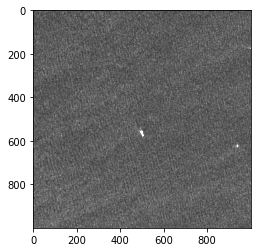

In [91]:
#Comuting subset of the image for demo processing
#Currently using 1000,1000 image
subset_min_size = 5000
subset_max_size = 6000
subset_data = band_data_arr[subset_min_size:subset_max_size,subset_min_size:subset_max_size]
subset_data = np.array(subset_data)
plt.imshow(subset_data,cmap='gray',vmin=0,vmax=255)
plt.imsave('Input_Image.png',subset_data,cmap='gray')
#print(subset_data.shape)

In [80]:
# Getting sliding window
#img is the image and m is the size of window (eg 3x3, 5x5)
def sliding_window(img,m):
    
    if m == 3:
         #make the loop for 3 and 5.
        s = img.shape[0]
        for i in range(1):
            z = np.zeros([s,1])
            img = np.concatenate((z,img),axis=1)
            
            z = np.zeros([s,1])
            img = np.concatenate((img,z),axis=1)
            
            s = s+2
            
            z = np.zeros([1,s])
            img = np.concatenate((img,z),axis=0)
            
            z = np.zeros([1,s])
            img = np.concatenate((img,z),axis=0)
        
    elif m==5:
        
        s = img.shape[0]
        for i in range(1):
            z = np.zeros([s,1])
            img = np.concatenate((z,img),axis=1)

            z = np.zeros([s,1])
            img = np.concatenate((img,z),axis=1)
            
            s = s+2

            z = np.zeros([1,s])
            img = np.concatenate((img,z),axis=0)

            z = np.zeros([1,s])
            img = np.concatenate((img,z),axis=0)

            z = np.zeros([s,1])
            img = np.concatenate((z,img),axis=1)

            z = np.zeros([s,1])
            img = np.concatenate((img,z),axis=1)
            
            s = s+2

            z = np.zeros([1,s])
            img = np.concatenate((img,z),axis=0)

            z = np.zeros([1,s])
            img = np.concatenate((img,z),axis=0)
            
    
    window= []
    stepSize = 1
    w_width = m
    w_height = w_width
    for x in range(0,  img.shape[1] - w_width +1, stepSize):
        for y in range(0, img.shape[0] - w_height +1, stepSize):
            window.append(img[x:x + w_width, y:y + w_height])
    
    window = np.array(window)
    return window


#getting center_pixel for every sliding window
def get_center_pixel(window):
    x_i = int(len(window)/2)
    return window[x_i][x_i]

#getting mean of sliding window
def getMean(window):
    return window.mean()

#getting stdev of sliding window
def getStdev(window):
    return window.std()  

#computing threshold for the sliding window
def compThreshold(window):
    center_pixel = get_center_pixel(window)
    win_mean = getMean(window)
    win_stdev = getStdev(window)
    return ((center_pixel-win_mean)/win_stdev)

#plotting binary image for the specific threshold.
#here img_d always takes ndarray.
def shipDetection_binaryImg(img_d,threshold):
    for i in range(len(img_d)):
        if img_d[i] >= threshold:
            img_d[i] = 1      #Valid ship
        else:
            img_d[i] = 0      #not a ship
        
    img_size = int(math.sqrt(len(img_d)))
    img_d_img = img_d.reshape(img_size,img_size)
    img = Image.fromarray(np.uint8(plt.cm.gist_earth(img_d_img)*255))
    display(img)
    img.save('detectedShip.png')

In [85]:
#arr = np.array(np.arange(36))
#arr = arr.reshape(6,6)
kernel_size = 3
win = sliding_window(subset_data,kernel_size)

In [86]:
win_thresh = []
for w in win:
    win_thresh.append((compThreshold(w)))

win_thresh = np.array((win_thresh))
avg_thre = (min(win_thresh) + (max(win_thresh)))/2
print(avg_thre,max(win_thresh),min(win_thresh))

-0.059121480278138794 2.5556771942395216 -2.673920154795799


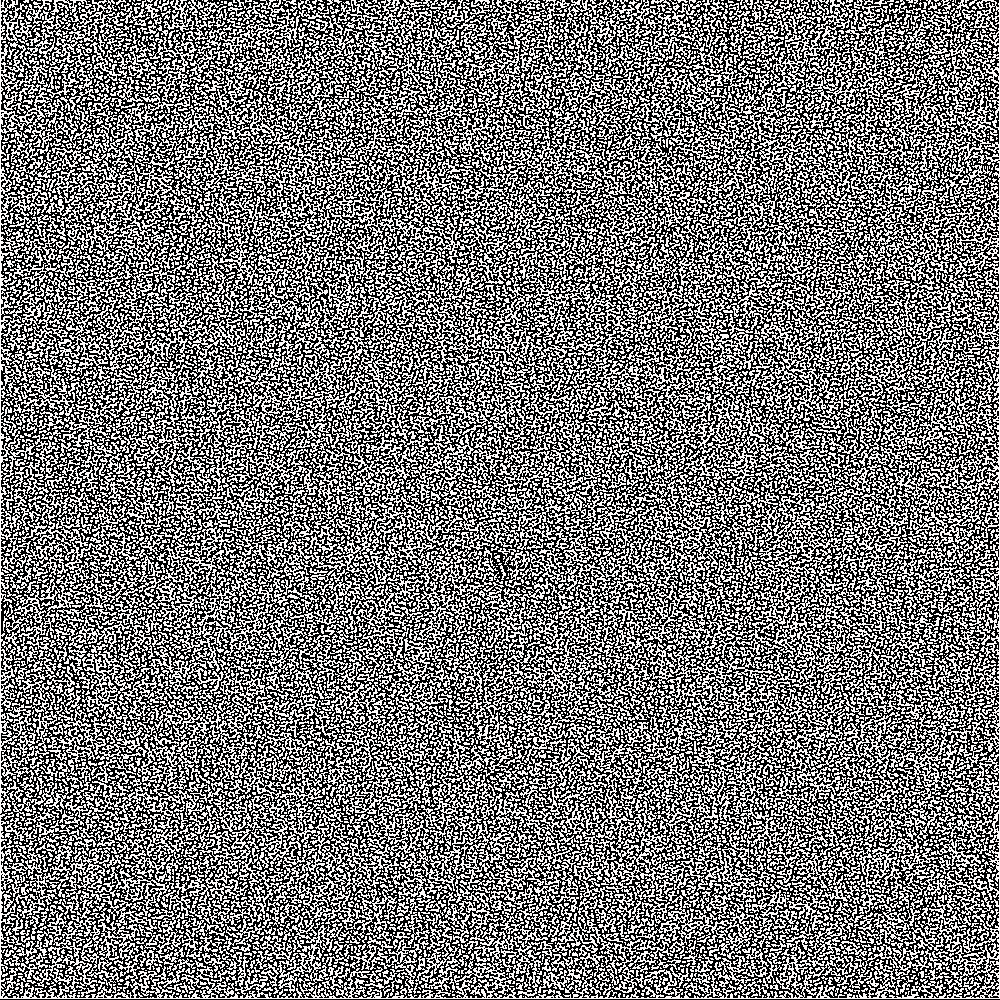

In [88]:
shipDetection_binaryImg(win_thresh,avg_thre+0.1)